# Advanced Visualisations

## Objectives

* Explore cleaned healthcare insurance data using advanced visualisations to gain insights into charging factors and feature relationships.

## Inputs

* Cleaned Dataset : 'data/processed/insurance-cleaned.csv'

## Outputs

* Correlation heatmaps
* Violin plots
* Pairplots
* Scatterplots and Boxplots (both static and interactive)

# Import data and packages

Install any packages needed:

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.formula.api as smf

sns.set(style='whitegrid', palette='muted')
pd.set_option('display.max_columns', None)

# Load cleaned data
df = pd.read_csv("../data/insurance-cleaned.csv")  
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1337 non-null   int64  
 1   sex           1337 non-null   object 
 2   bmi           1337 non-null   float64
 3   children      1337 non-null   int64  
 4   smoker        1337 non-null   int64  
 5   region        1337 non-null   int64  
 6   charges       1337 non-null   float64
 7   bmi_category  1337 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 83.7+ KB


(   age     sex     bmi  children  smoker  region      charges bmi_category
 0   19  female  27.900         0       1       3  16884.92400   Overweight
 1   18    male  33.770         1       0       2   1725.55230        Obese
 2   28    male  33.000         3       0       2   4449.46200        Obese
 3   33    male  22.705         0       0       1  21984.47061       Normal
 4   32    male  28.880         0       0       1   3866.85520   Overweight,
 None)

* The Dataset is loaded and required packages installed.

In [63]:
df['smoker'] = df['smoker'].map({0: 'no', 1: 'yes'})
df["sex"] = df["sex"].map({0: "female", 1: "male"})

* Feature engineering to convert smoker and sex values into yes/no for better visualisation.

# 

# Global Visual Context

* This will use a pairplot and a heatmap to give a data overview before deeper hypothesis testing.
* Having a wider overview will make exploring the relationships between our key variables and detect trends.

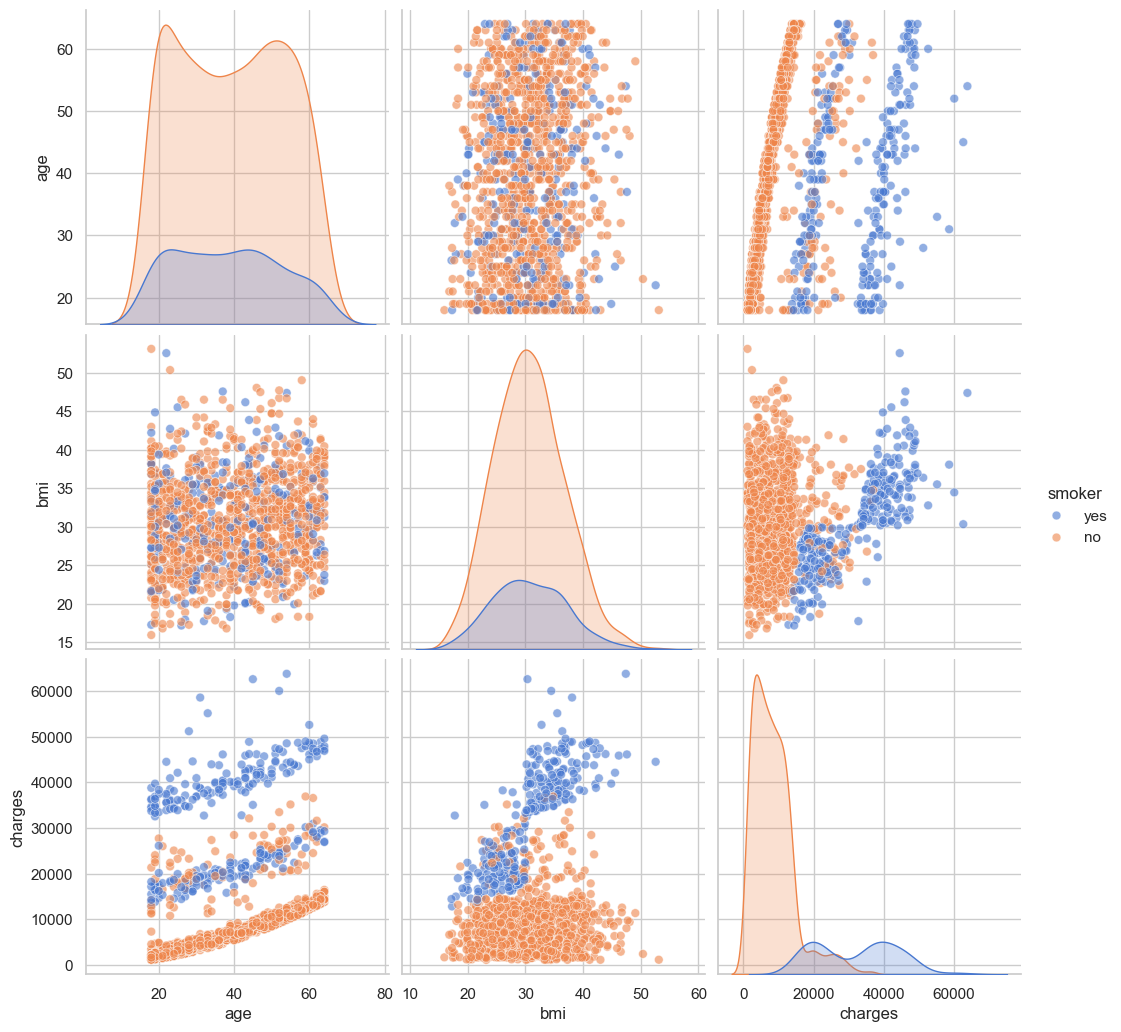

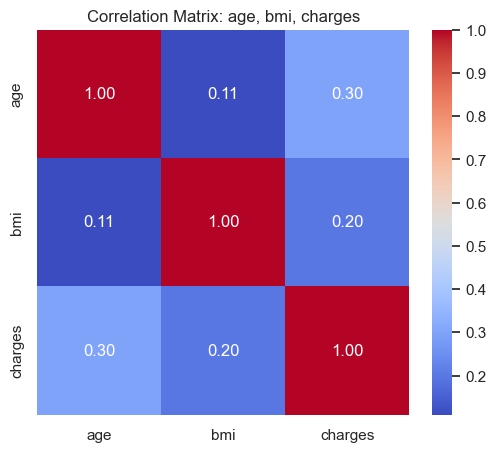

In [64]:
sns.set(style="whitegrid", palette="muted")

g = sns.pairplot(
    df,
    vars=['age', 'bmi', 'charges'],
    hue='smoker',
    diag_kind='kde',
    height=3.5,         # increase this for larger subplots (default is ~2.5)
    plot_kws={'alpha': 0.6, 's': 40},  # alpha = transparency, s = marker size
)

num_vars = ['age', 'bmi', 'charges']
plt.figure(figsize=(6, 5))
sns.heatmap(df[num_vars].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix: age, bmi, charges")
plt.show()

*  The pairplot highlights visible trends:  
**Charges** increase with both **age** and **BMI**.  
Smokers (orange) cluster at higher charge levels.

* The correlation heatmap confirms strong positive relationships between **age**, **BMI**, and **charges**.

# Hypothesis 1: Smokers Have Higher Charges Than Non-Smokers

We hypothesize that smokers have significantly higher average medical charges.

- **Test:** Smokers’ mean charges are higher


C:\Users\harry\AppData\Local\Temp\ipykernel_2668\4019293287.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




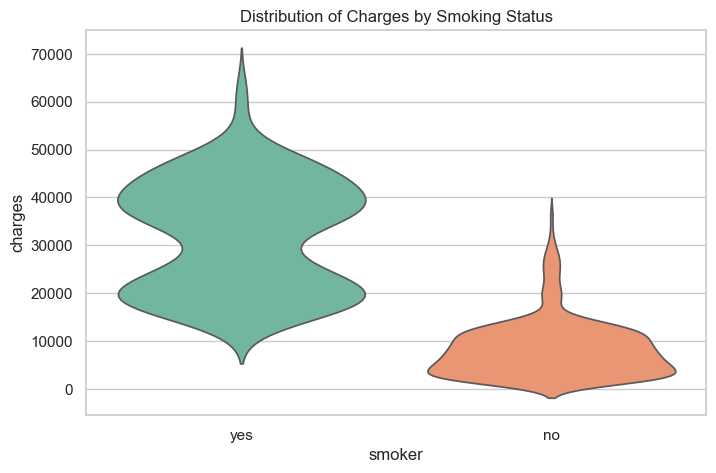

In [65]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="smoker", y="charges", data=df, inner=None, palette="Set2")

plt.title("Distribution of Charges by Smoking Status")
plt.show()


* The violin plot shows that smokers’ charges are substantially higher. 

# Hypothesis 2: Charges Positively Correlate with BMI

We expect that higher BMI is associated with higher medical costs.

- **Test:** For positive correlation. 

In [66]:
fig = px.scatter(df, x="bmi", y="charges", color="smoker", trendline="ols",
                 title="Interactive Scatter Plot: Charges vs BMI by Smoking Status")
fig.show()

* Interactive scatter plot shows a **positive trend**, stronger for smokers.  
* Correlation also confirms a significant positive relationship between BMI and charges.


# Hypothesis 3: Charges Positively Correlate with Age

* Older individuals are expected to have higher charges.


In [68]:
df['age_group'] = pd.cut(df['age'], bins=range(1, 81, 10), right=True, labels=[f"{i}-{i+9}" for i in range(1, 71, 10)])
age_group_means = df.groupby('age_group')['charges'].mean().reset_index()

fig = px.bar(age_group_means, x='age_group', y='charges',
             title="Average Charges by Age Group (10-year bins)",
             labels={'age_group': 'Age Group', 'charges': 'Average Charges'})
fig.show()

C:\Users\harry\AppData\Local\Temp\ipykernel_2668\3753676230.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



* Charges increase with age, correlation is positive and statistically significant.